In [2]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-news/FakeNewsNet.csv


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('FakeNewsNet.csv')


In [17]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['title'])
sequences = tokenizer.texts_to_sequences(data['title'])

max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

X = padded_sequences
y = data['real'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
embedding_dim = 32
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_length),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
580/580 [==============================] - 31s 48ms/step - loss: 0.5649 - accuracy: 0.7507 - val_loss: 0.5713 - val_accuracy: 0.7563
Epoch 2/5
580/580 [==============================] - 28s 48ms/step - loss: 0.5597 - accuracy: 0.7508 - val_loss: 0.5376 - val_accuracy: 0.7563
Epoch 3/5
580/580 [==============================] - 27s 47ms/step - loss: 0.5169 - accuracy: 0.7522 - val_loss: 0.5048 - val_accuracy: 0.7653
Epoch 4/5
580/580 [==============================] - 27s 47ms/step - loss: 0.4546 - accuracy: 0.7929 - val_loss: 0.5080 - val_accuracy: 0.7649
Epoch 5/5
580/580 [==============================] - 27s 46ms/step - loss: 0.3914 - accuracy: 0.8307 - val_loss: 0.5288 - val_accuracy: 0.7556


In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

145/145 [==============================] - 2s 14ms/step - loss: 0.5288 - accuracy: 0.7556
Loss: 0.5288, Accuracy: 0.7556


In [21]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

Epoch 1/5
580/580 [==============================] - 27s 47ms/step - loss: 0.3482 - accuracy: 0.8572 - val_loss: 0.5618 - val_accuracy: 0.7491
Epoch 2/5
580/580 [==============================] - 27s 47ms/step - loss: 0.3067 - accuracy: 0.8815 - val_loss: 0.5840 - val_accuracy: 0.7453
Epoch 3/5
580/580 [==============================] - 27s 47ms/step - loss: 0.2767 - accuracy: 0.8981 - val_loss: 0.6083 - val_accuracy: 0.7325
Epoch 4/5
580/580 [==============================] - 27s 47ms/step - loss: 0.2402 - accuracy: 0.9157 - val_loss: 0.6771 - val_accuracy: 0.7328
Epoch 5/5
580/580 [==============================] - 28s 48ms/step - loss: 0.2132 - accuracy: 0.9270 - val_loss: 0.7176 - val_accuracy: 0.7287


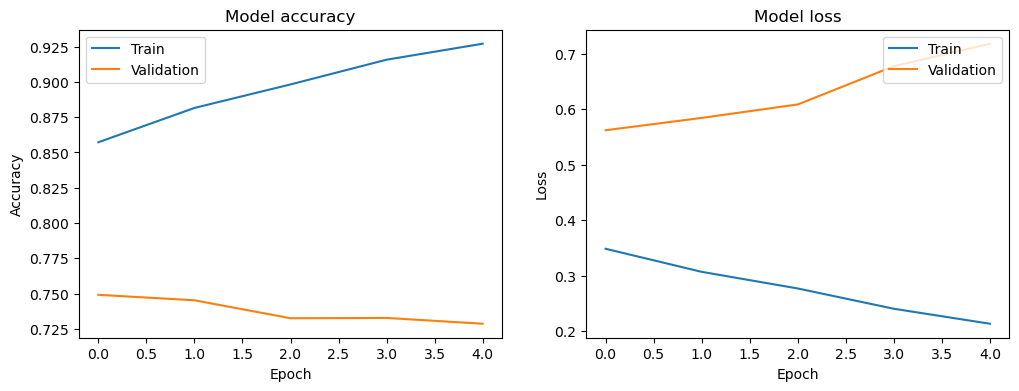

In [22]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

plot_history(history)